# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
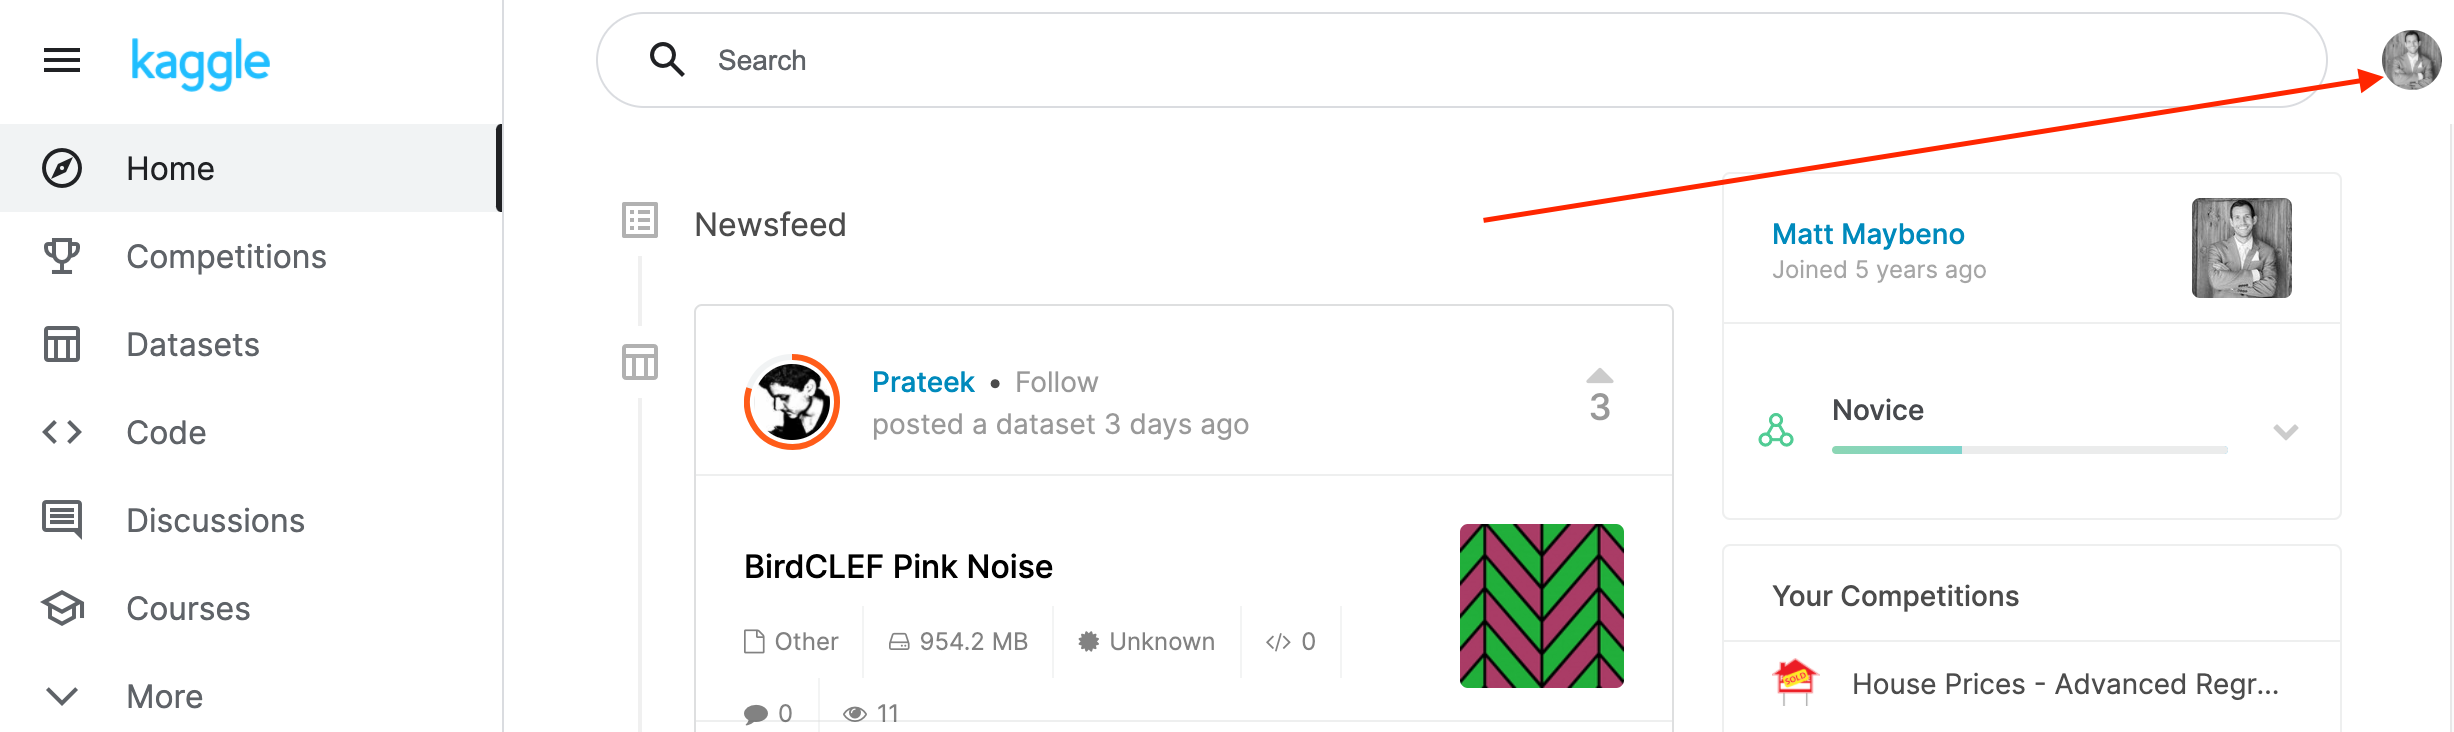
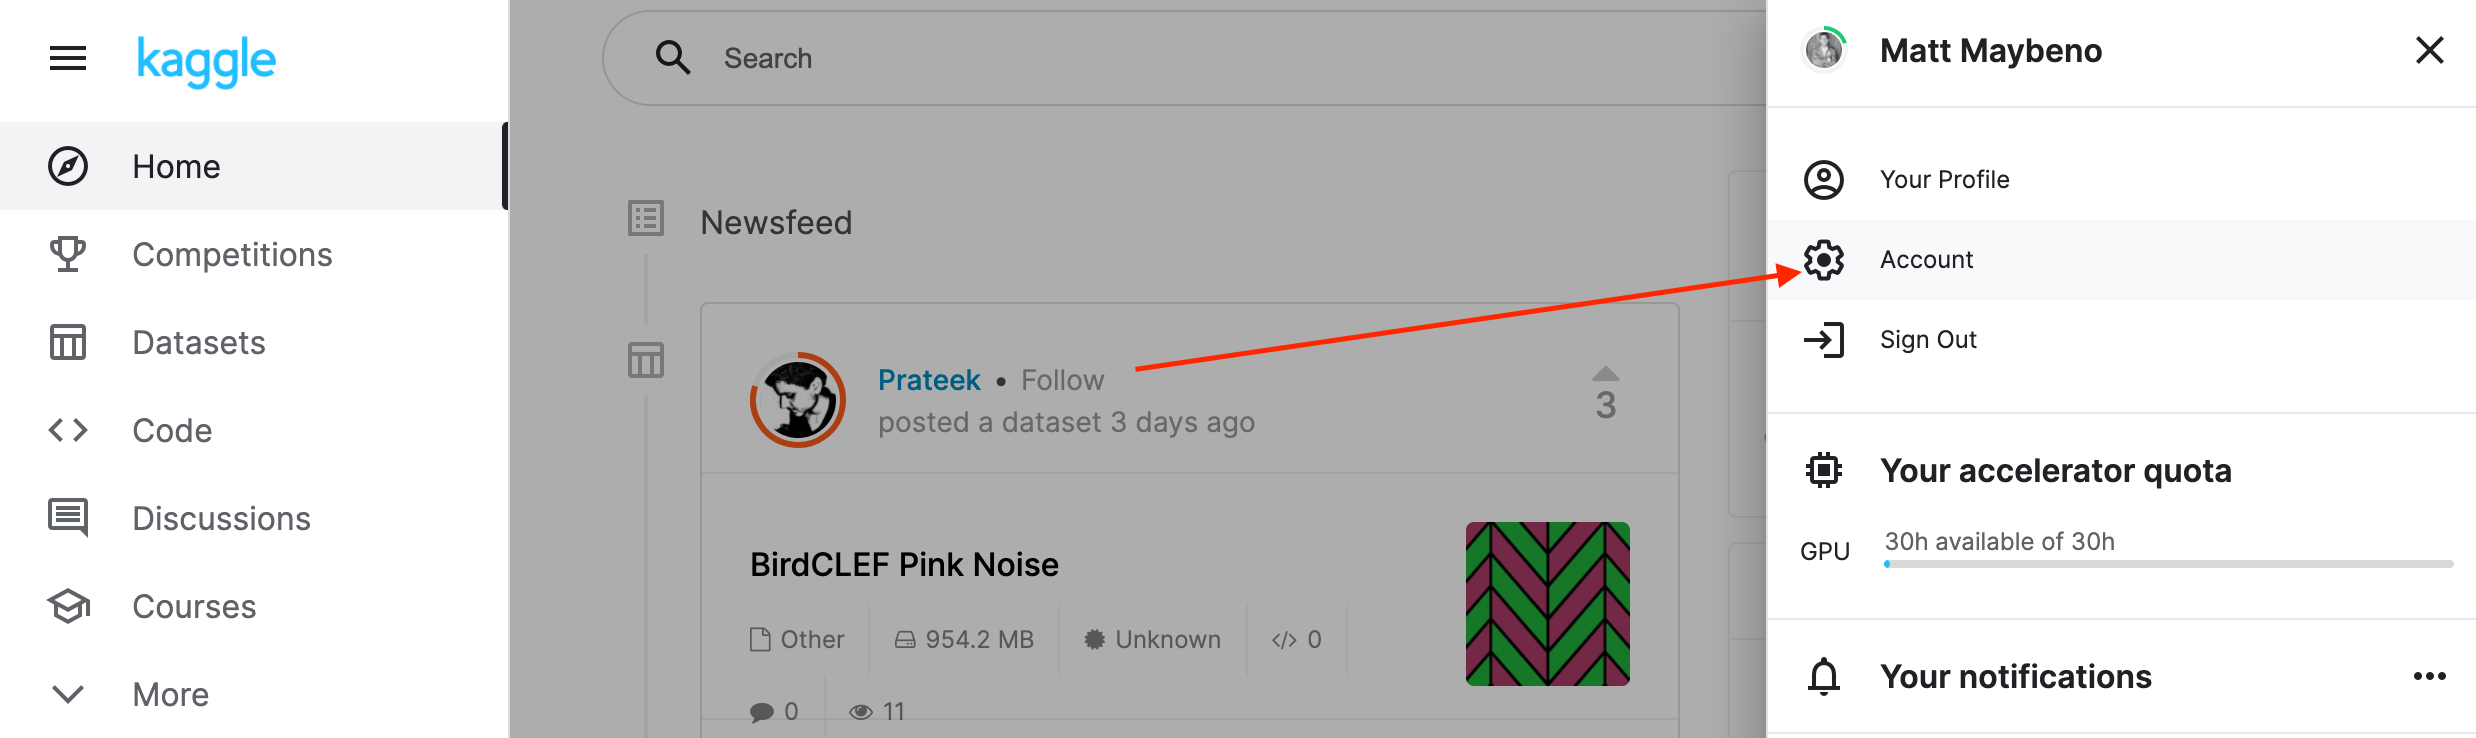
2. Scroll down to API and click Create New API Token.
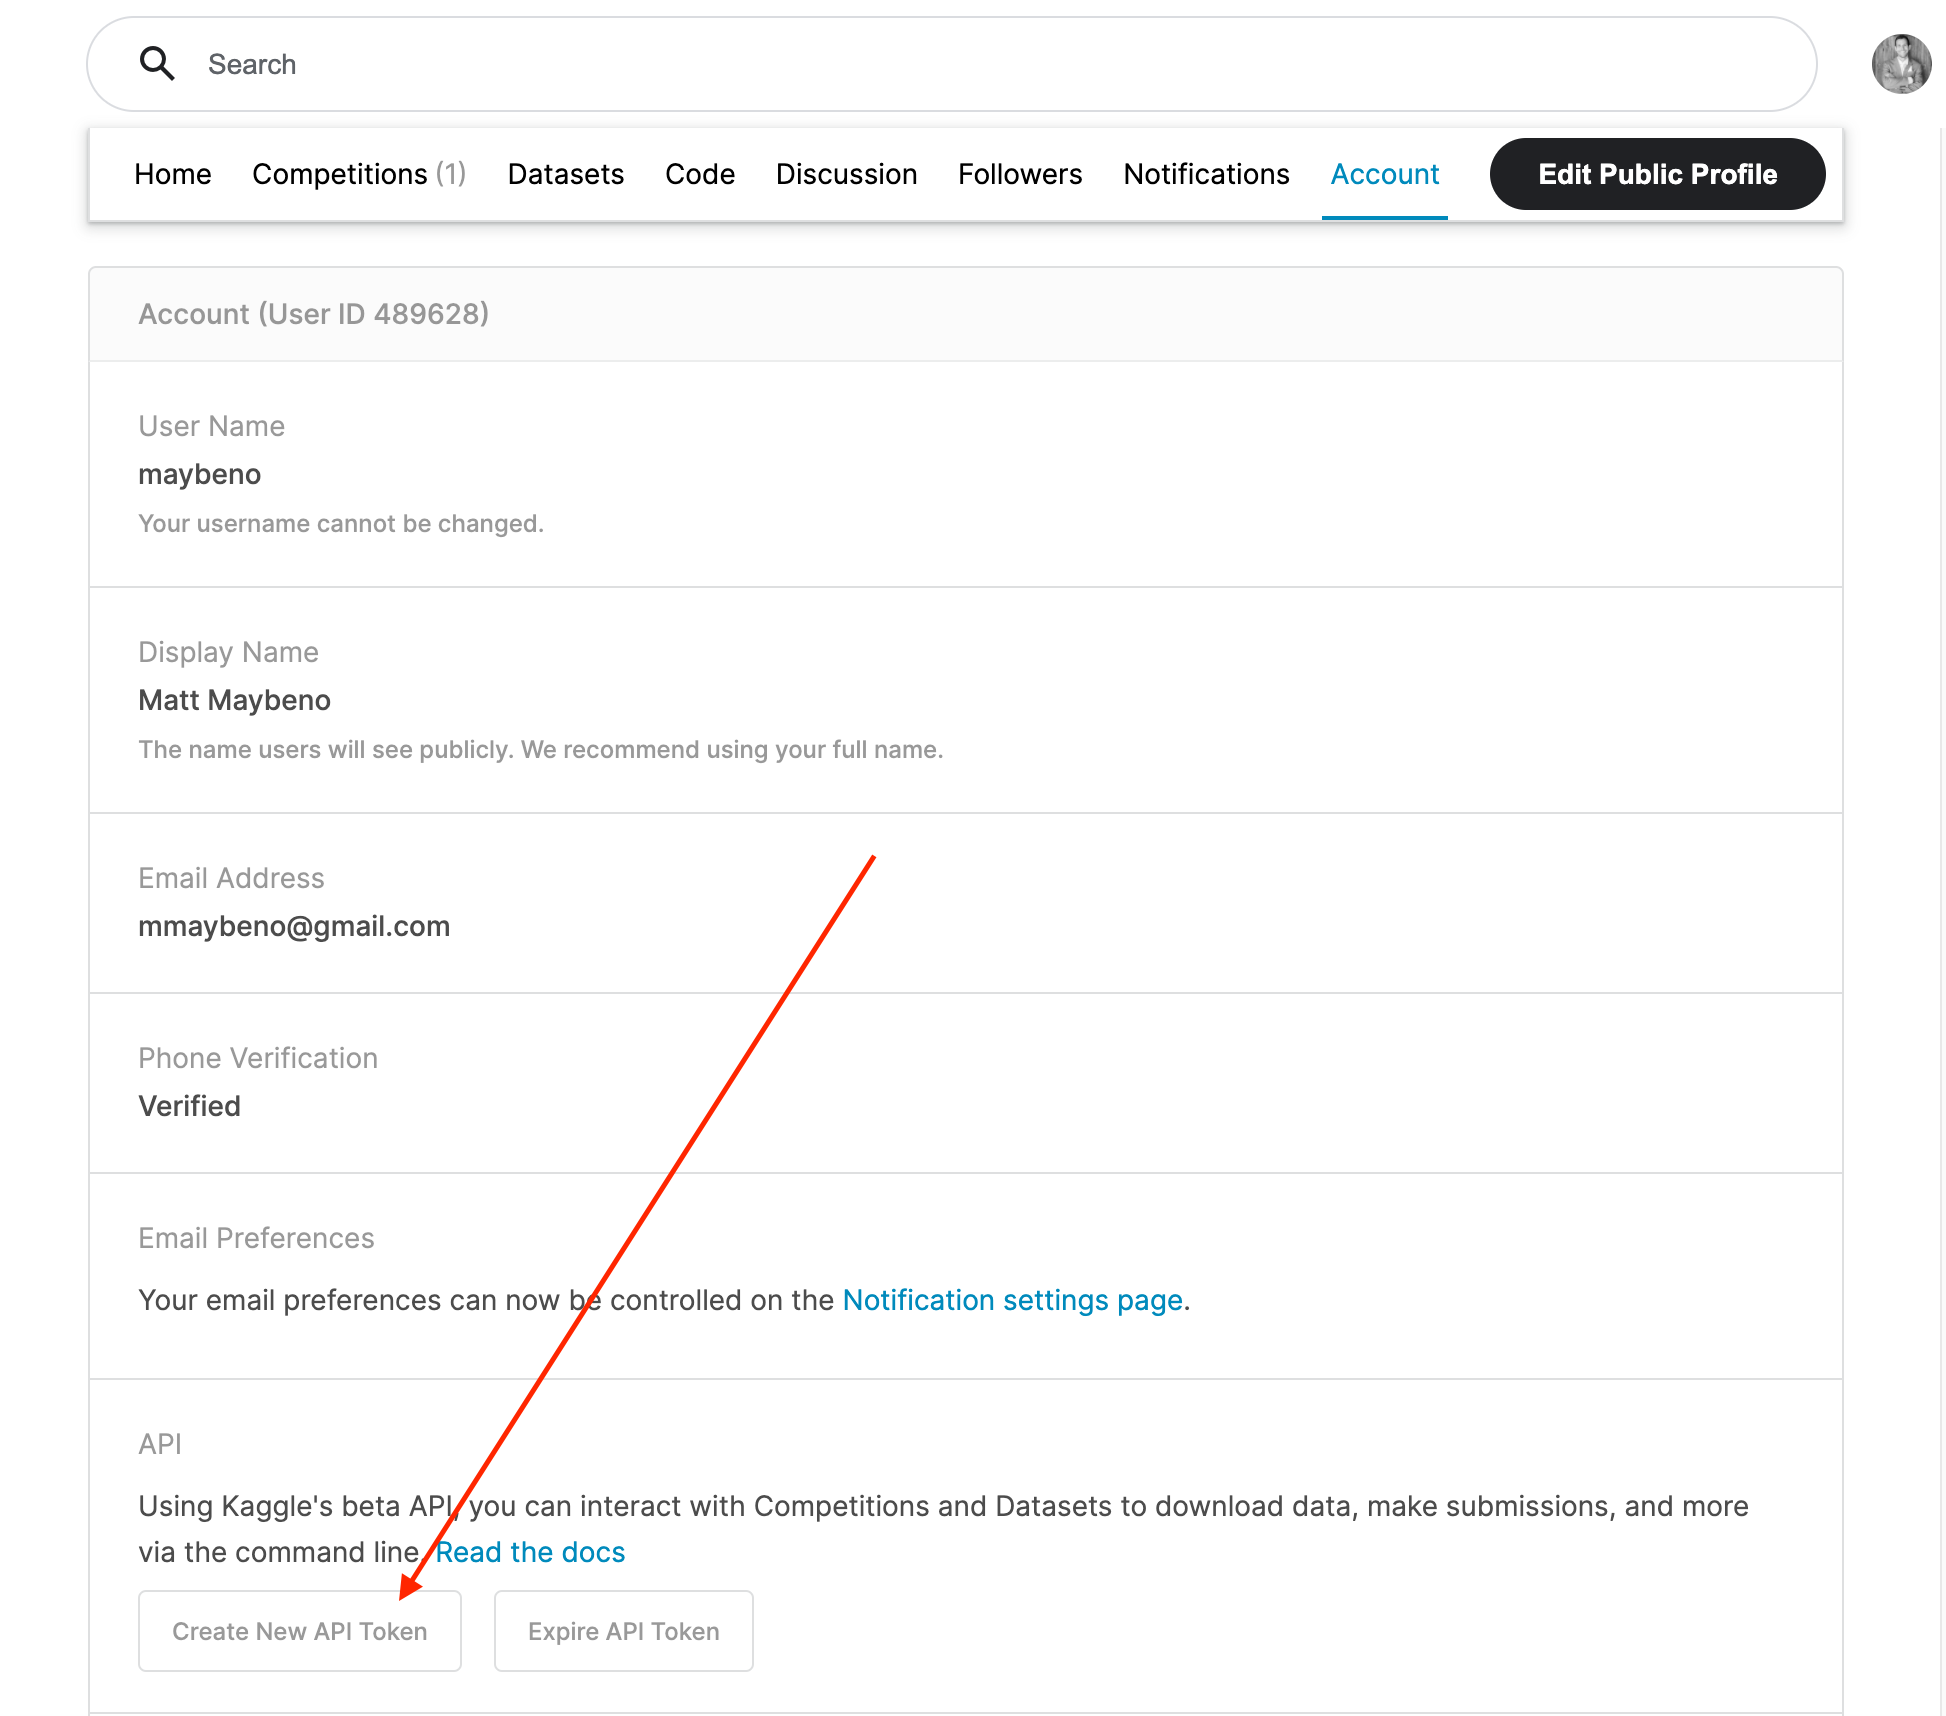
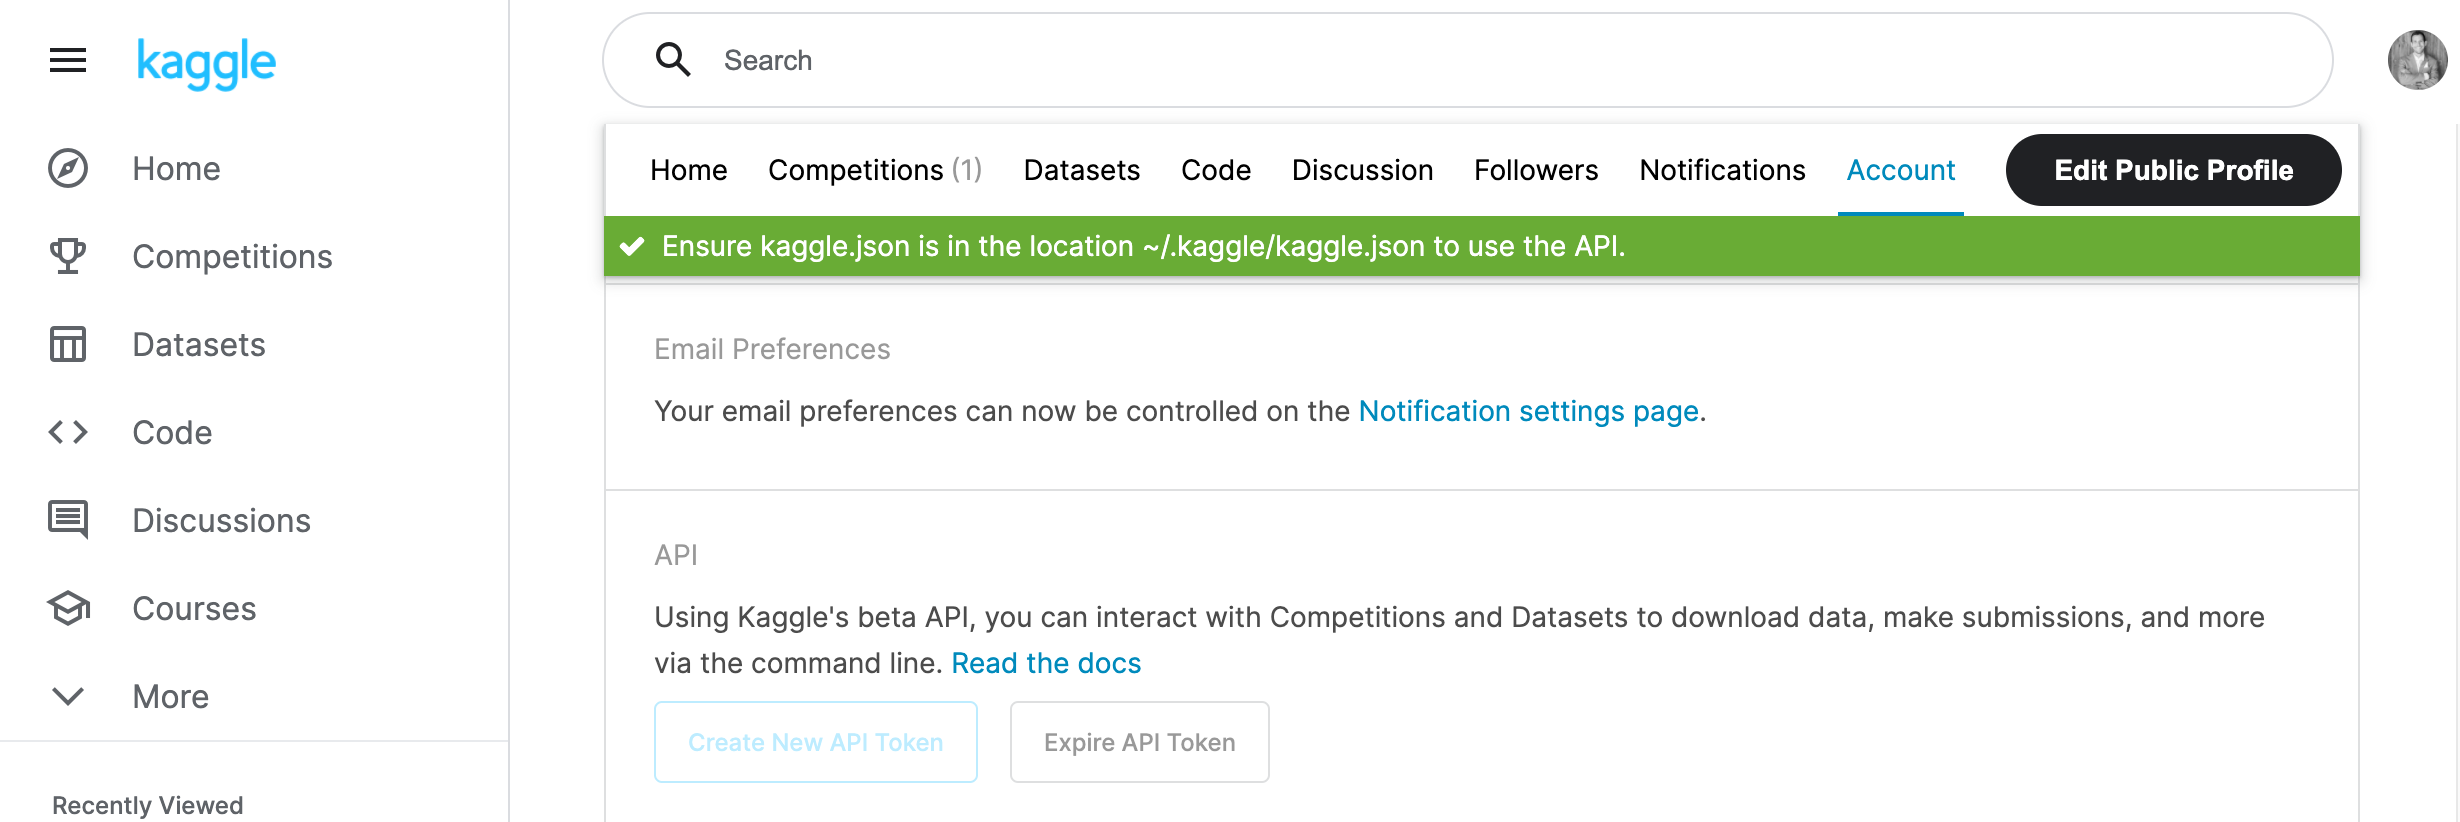
3. Open up `kaggle.json` and use the username and key.
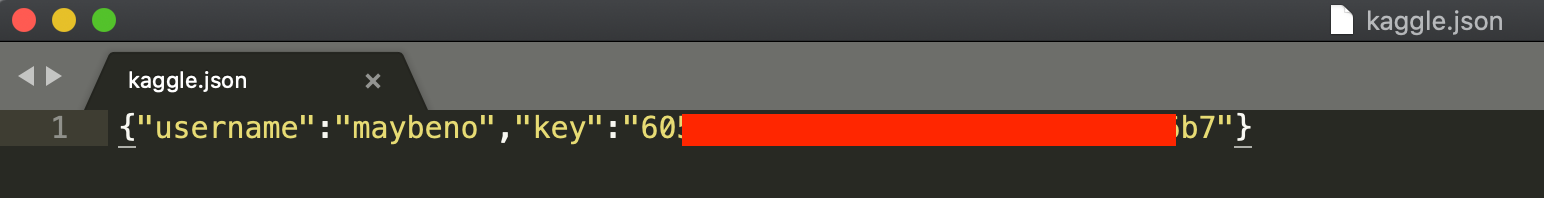

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 72.1.0
    Uninstalling setuptools-72.1.0:
      Successfully uninstalled setuptools-72.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autogluon-multimodal 1.1.1 requires nvidia-ml-py3==7.352.0, which is not installed.
dash 2.17.1 requires dash-core-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-html-components==2.0.0, which is not installed.
dash 2.17.1 requires dash-table==5.0.0, which is not installed.
autogluon-core 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.4.2 which is incompatible.
autogluon-features 1.1.1 requires scikit-learn<1.4.1,>=1.3.0, but you have scikit-learn 1.4.2 which is incompatible.
aut

In [2]:
pip install kaggle

  Using cached kaggle-1.6.17-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
# !mkdir -p /root/.kaggle
# !touch /root/.kaggle/kaggle.json
# !chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
# import json
# kaggle_username = ""
# kaggle_key = ""

# # Save API token the kaggle.json file
# with open("/root/.kaggle/kaggle.json", "w") as f:
#     f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
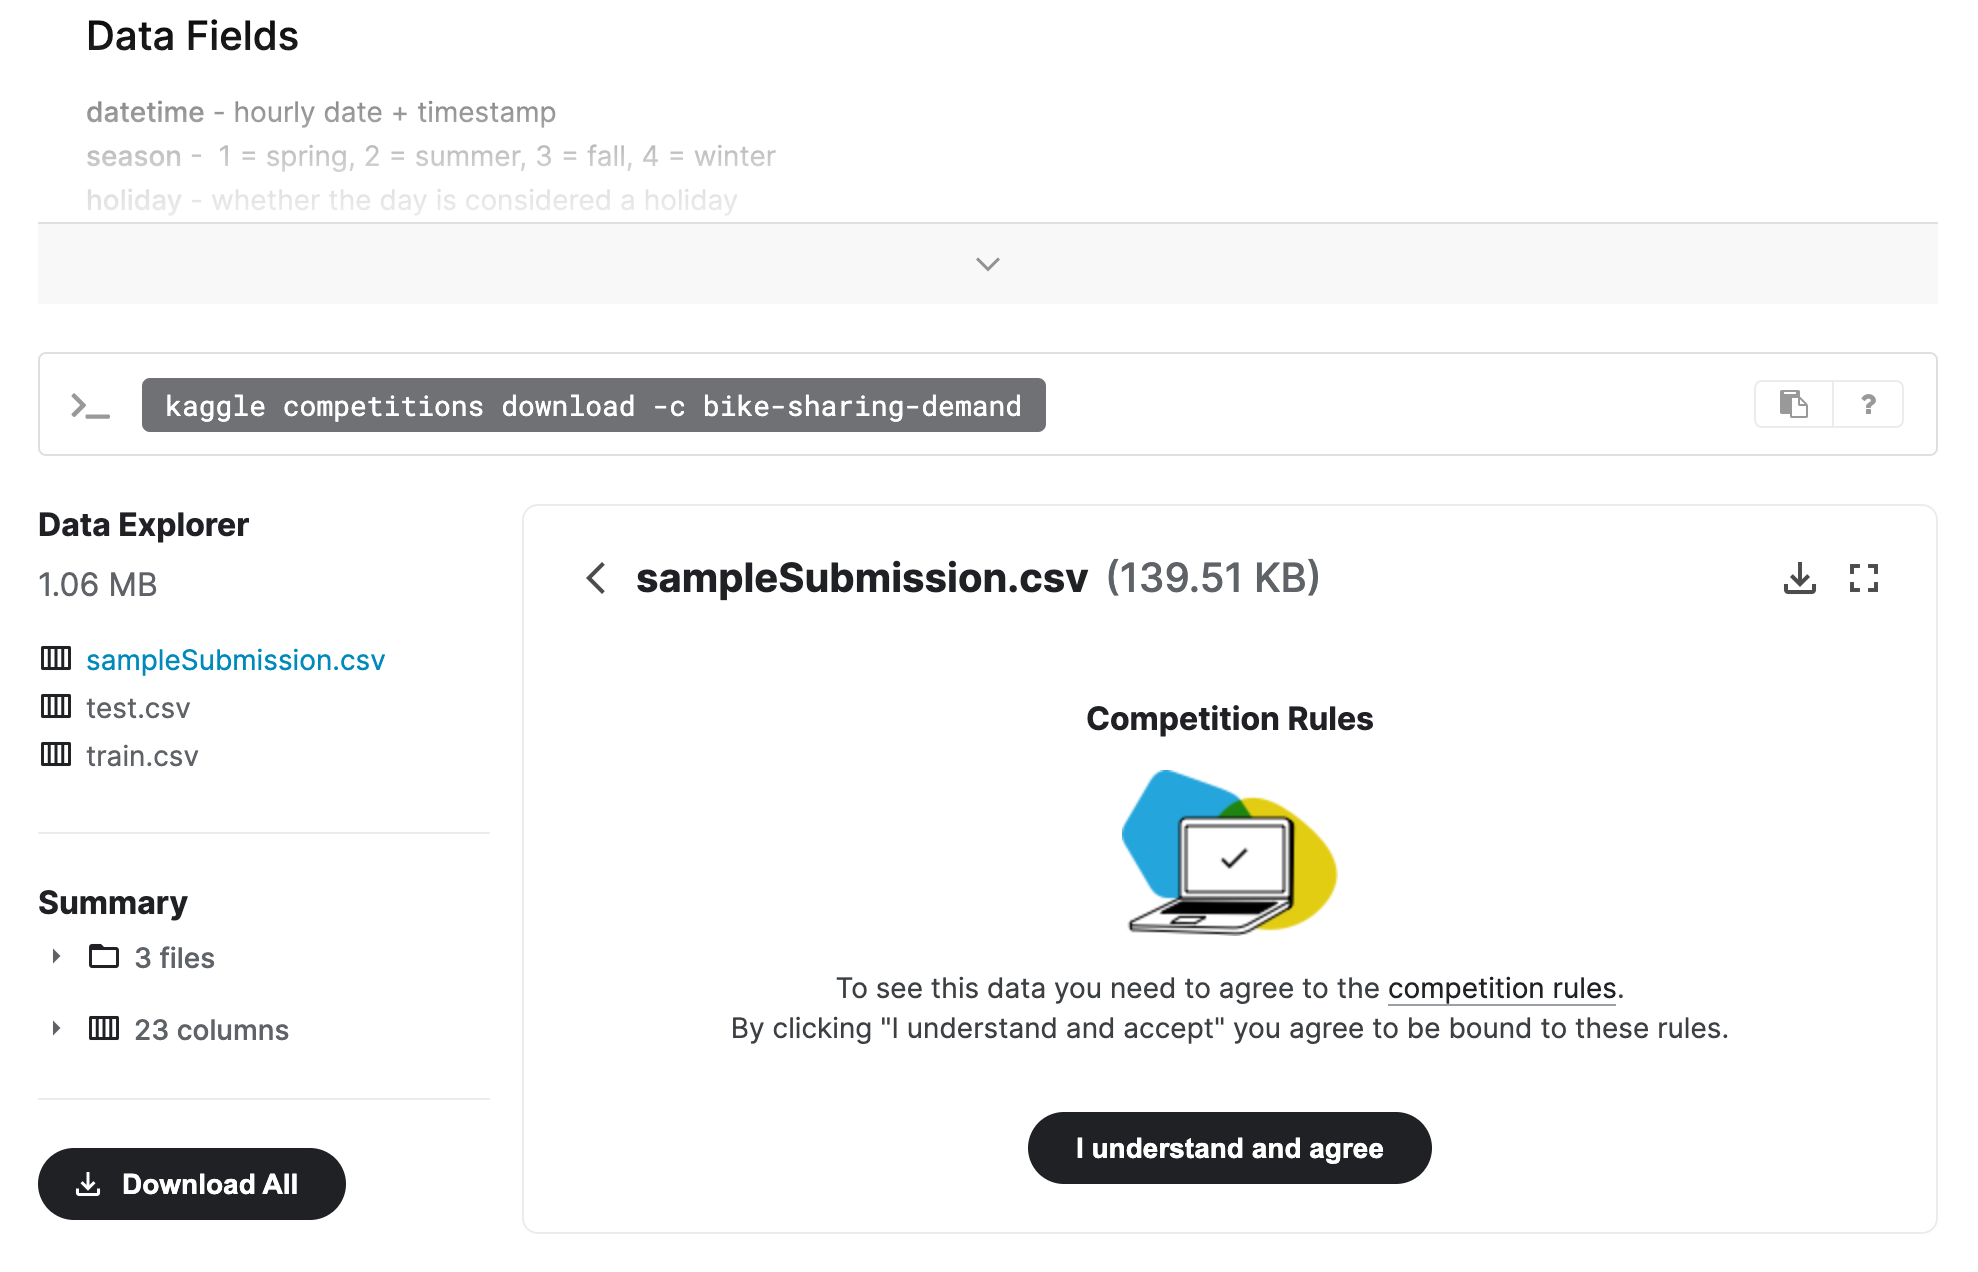

In [12]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 23.3MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [9]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [10]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [31]:
predictor = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]}
                            ).fit(train_data=train,
    time_limit=600,
    presets="best_quality",)

No path specified. Models will be saved in: "AutogluonModels/ag-20241008_071047"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Sep 10 22:02:55 UTC 2024
CPU Count:          2
Memory Avail:       1.25 GB / 3.76 GB (33.1%)
Disk Space Avail:   3.05 GB / 4.99 GB (61.1%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to iden

### Review AutoGluon's training run with ranking of models that did the best.

In [34]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.024613  root_mean_squared_error      19.723239  267.818071                0.000536           0.030799            3       True         11
1   RandomForestMSE_BAG_L2  -53.303903  root_mean_squared_error      19.379783  243.148114                0.954248          31.989601            2       True         10
2          LightGBM_BAG_L2  -54.968366  root_mean_squared_error      18.768455  235.797671                0.342920          24.639158            2       True          9
3        LightGBMXT_BAG_L2  -60.758660  root_mean_squared_error      22.660152  272.338339                4.234618          61.179826            2       True          8
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.058370    0.037222   

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -131.5193720485577,
  'WeightedEnsemble_L2': -84.12506123181602,
  'LightGBMXT_BAG_L2': -60.75866003214449,
  'LightGBM_BAG_L2': -54.9683660

<Axes: xlabel='model'>

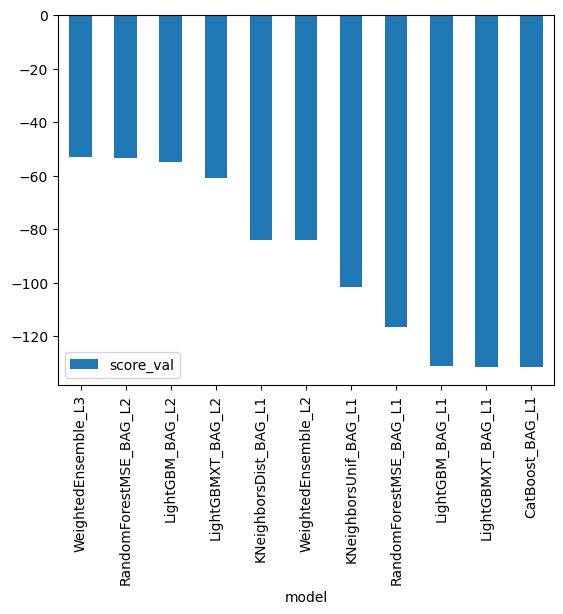

In [33]:
predictor.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

### Create predictions from test dataset

In [35]:
predictions = predictor.predict(test)

/opt/conda/lib/python3.11/site-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [36]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.076355
std        89.351151
min         3.150385
25%        19.707144
50%        63.960365
75%       167.611664
max       366.040771
Name: count, dtype: float64

In [37]:
# How many negative values do we have?
any(predictions<0)

False

In [38]:
# Set them to zero
# Not needed

### Set predictions to submission dataframe, save, and submit

In [39]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [40]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 674kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [41]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv               2024-10-08 07:24:07  first raw submission  complete  1.80200      1.80200       
submission_new_features.csv  2024-10-07 08:24:59  new features          complete  1.80649      1.80649       
submission.csv               2024-10-07 07:53:15  first raw submission  complete  1.80649      1.80649       


#### Initial score of `1.80200`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

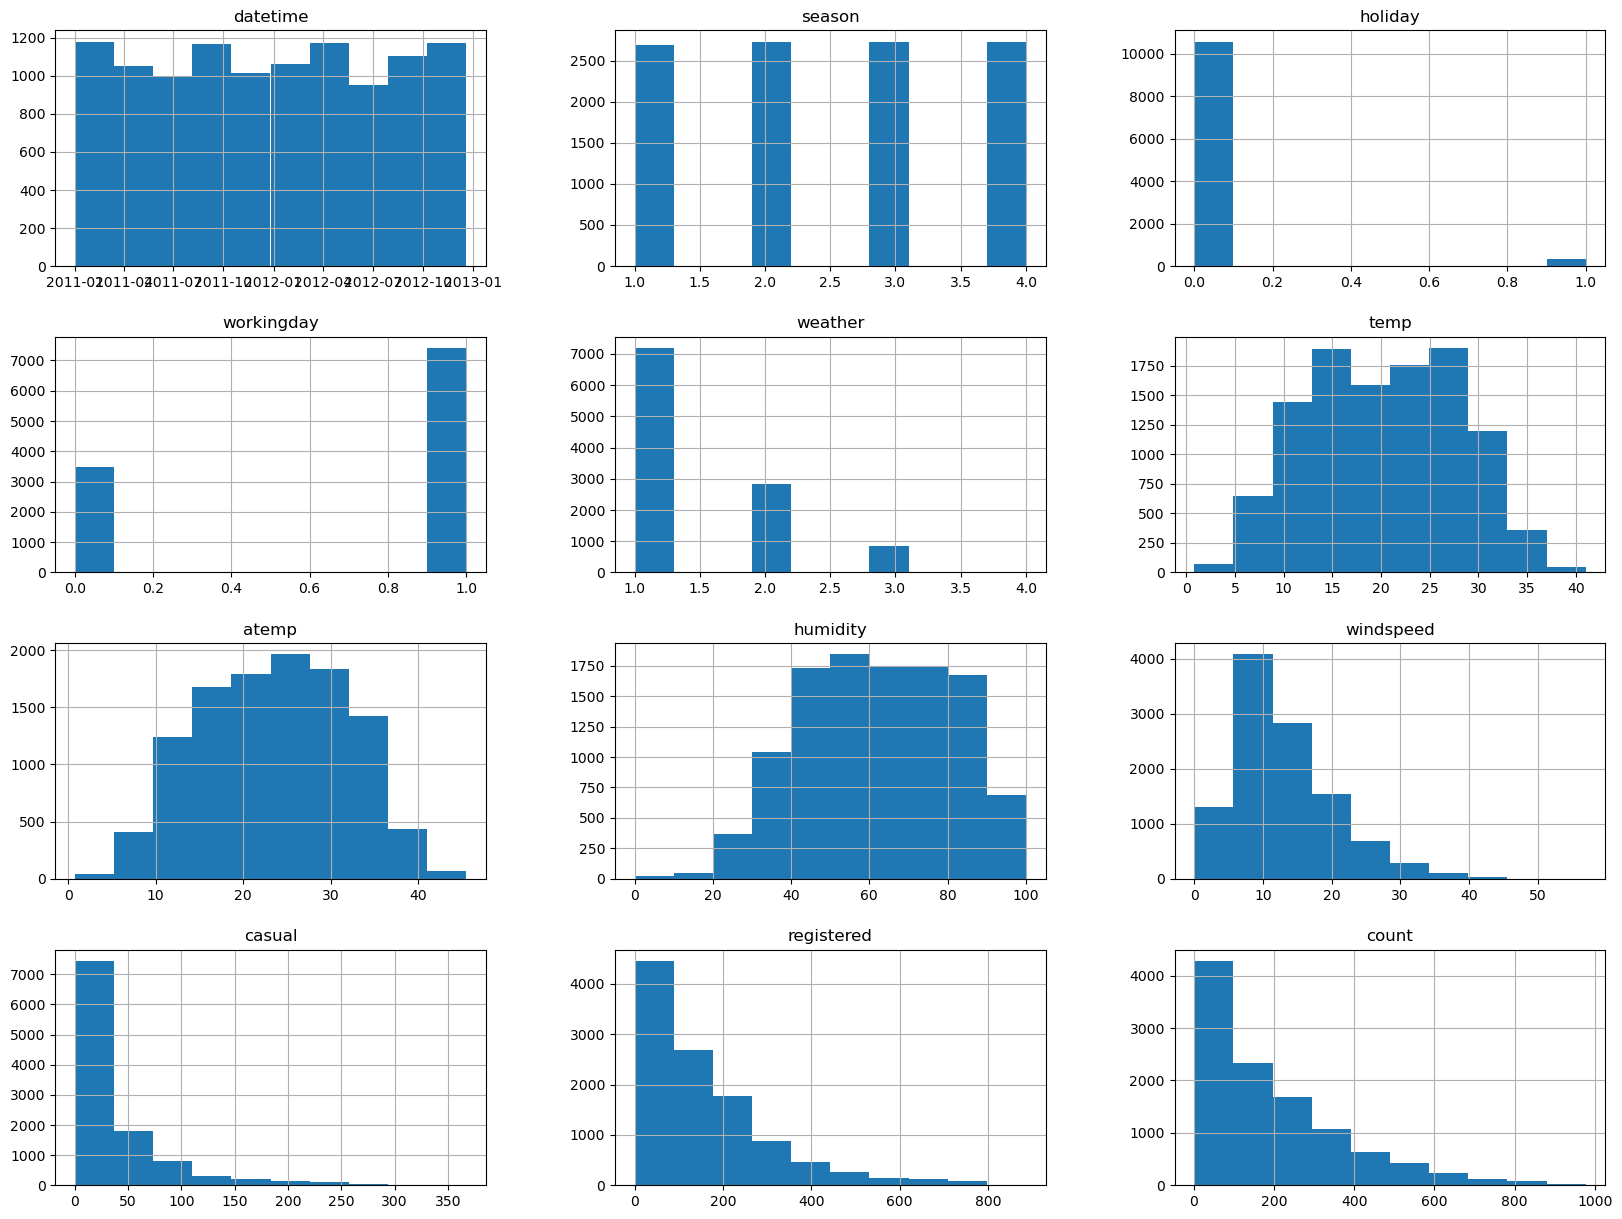

In [42]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(20,15))

In [14]:
# create a new feature
train['year'] = train.datetime.dt.year
train['month'] = train.datetime.dt.month
train['day'] = train.datetime.dt.day
train['hour'] = train.datetime.dt.hour
train['minute'] = train.datetime.dt.minute
train['second'] = train.datetime.dt.second
test['year'] = test.datetime.dt.year
test['month'] = test.datetime.dt.month
test['day'] = test.datetime.dt.day
test['hour'] = test.datetime.dt.hour
test['minute'] = test.datetime.dt.minute
test['second'] = test.datetime.dt.second

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [15]:
train["season"] = train["season"].astype('category')
train["weather"] = train["weather"].astype('category')
test["season"] = test["season"].astype('category')
test["weather"] = test["weather"].astype('category')

In [16]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>,
        <Axes: title={'center': 'minute'}>,
        <Axes: title={'center': 'second'}>]], dtype=object)

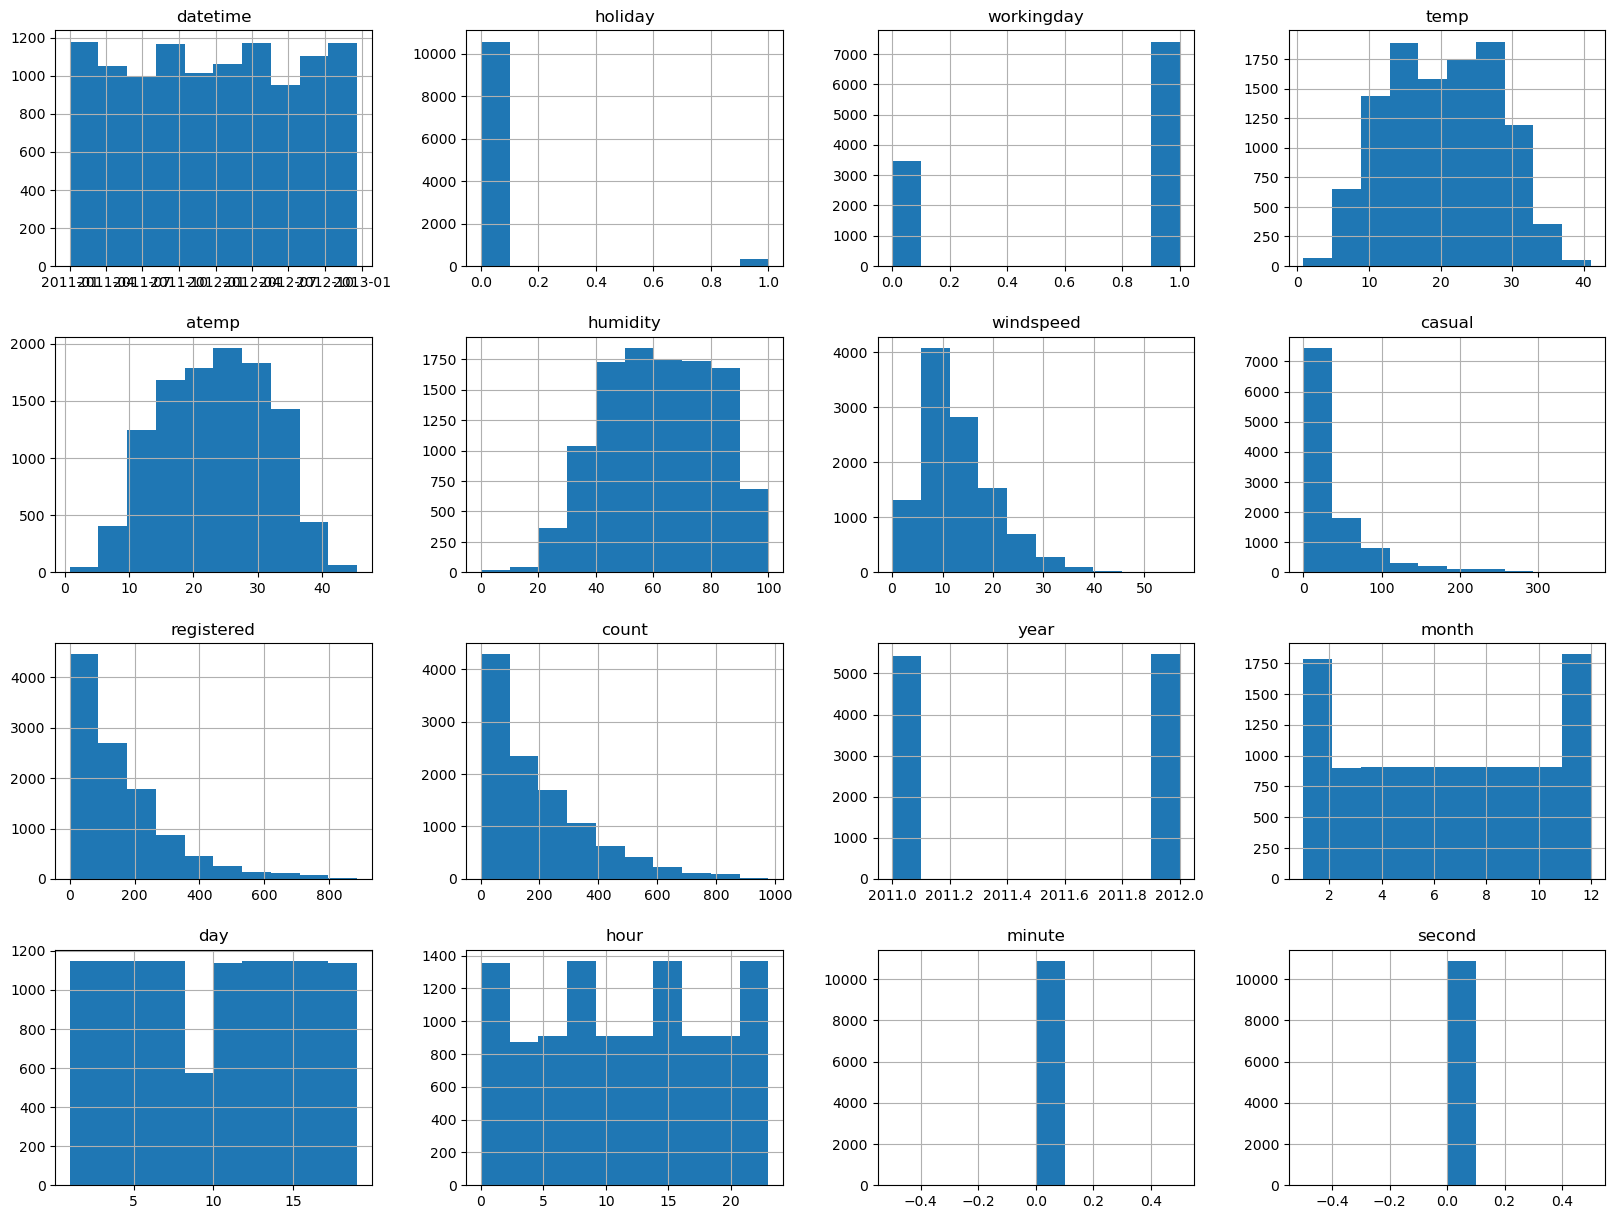

In [17]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(20,15))

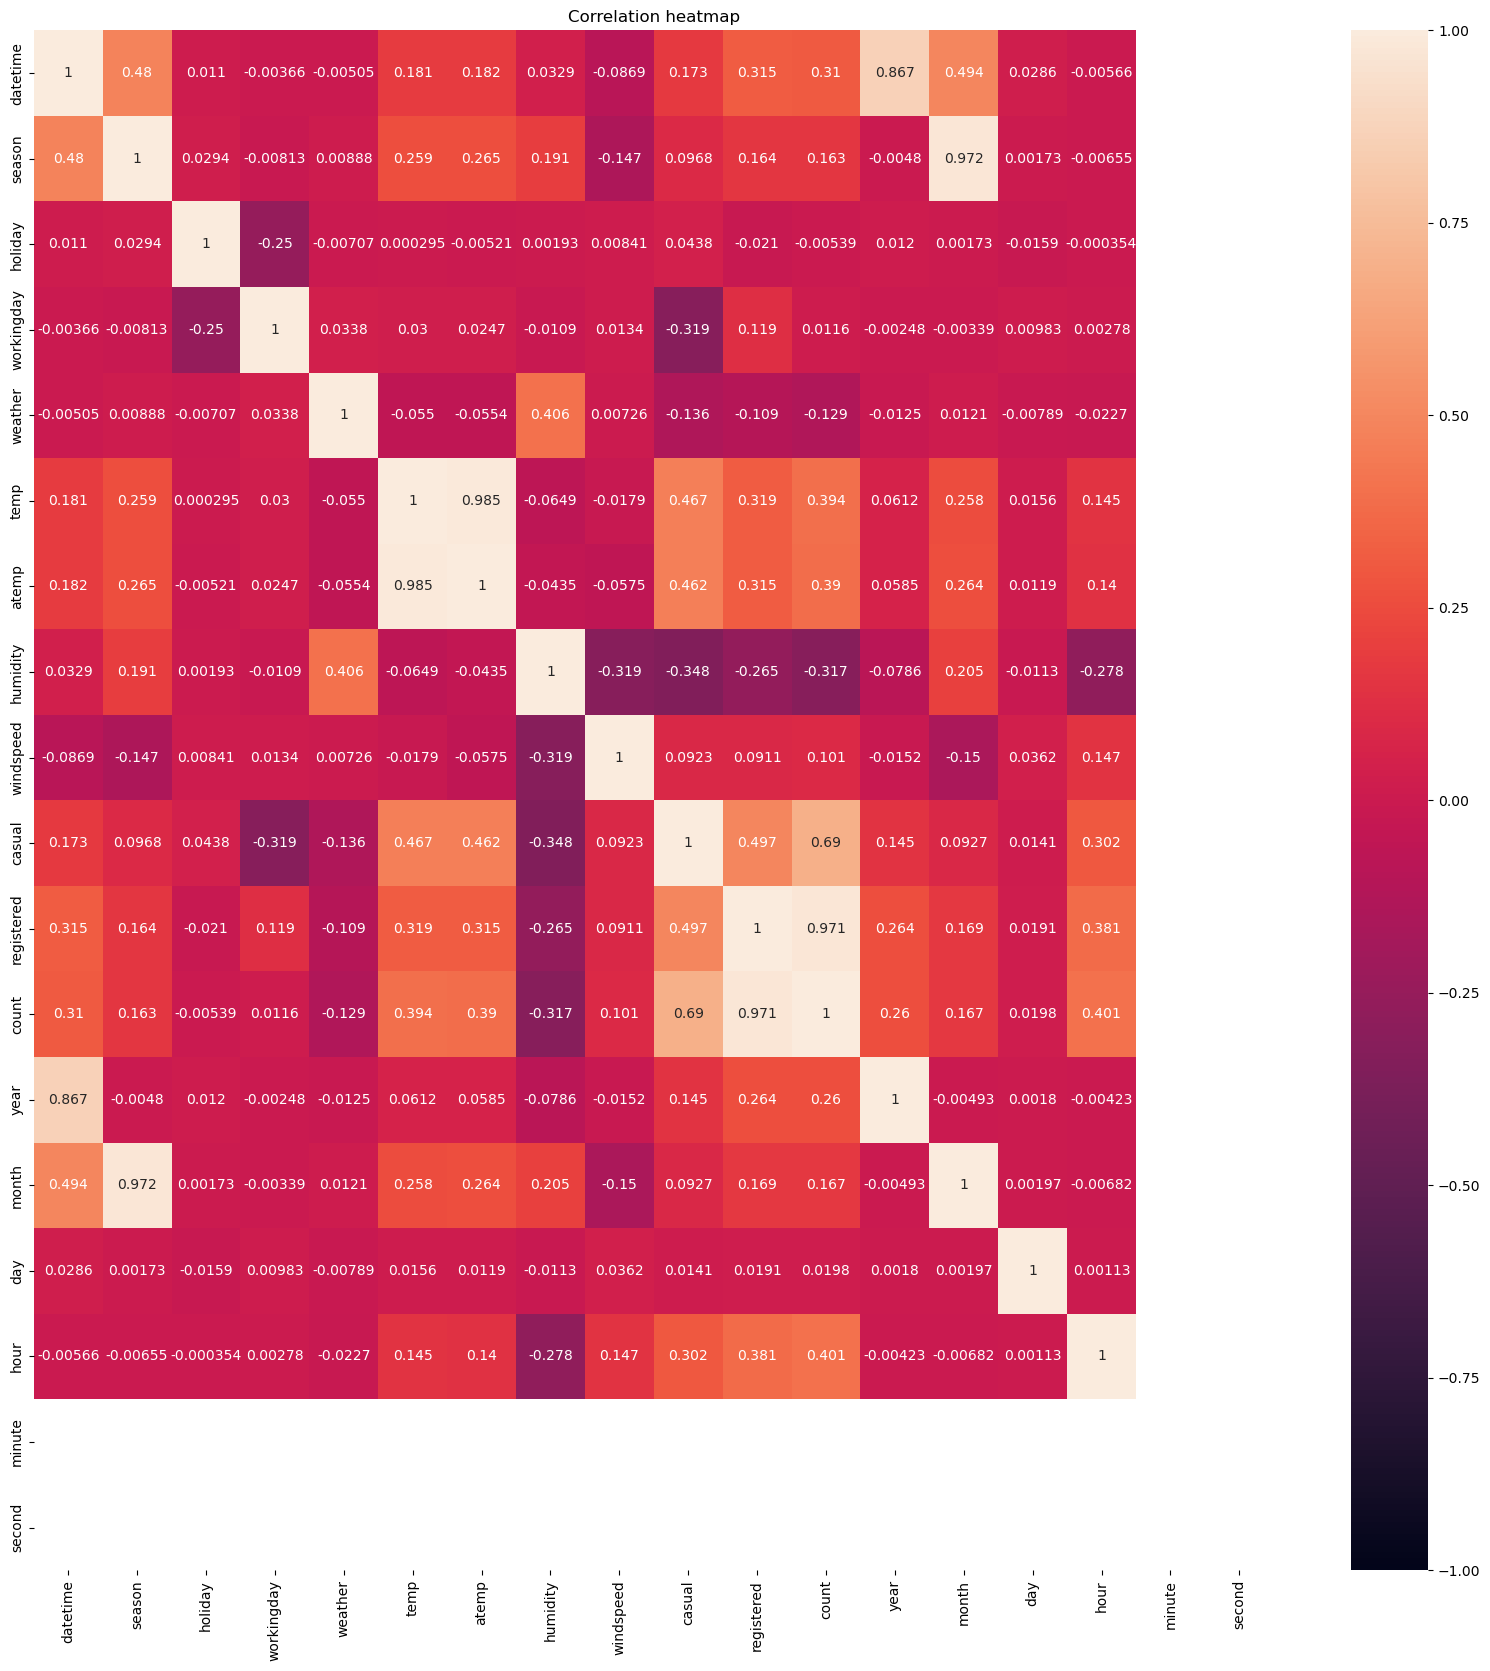

In [23]:
plt.figure(figsize = (20,20))
sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True, fmt='.3g')
plt.title('Correlation heatmap')
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [47]:
predictor_new_features = TabularPredictor(label="count", problem_type="regression", eval_metric='root_mean_squared_error', learner_kwargs={"ignored_columns": ["casual", "registered"]}).fit(train_data=train,
    time_limit=600,
    presets="best_quality",)

No path specified. Models will be saved in: "AutogluonModels/ag-20241008_072520"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Sep 10 22:02:55 UTC 2024
CPU Count:          2
Memory Avail:       1.53 GB / 3.76 GB (40.6%)
Disk Space Avail:   2.35 GB / 4.99 GB (47.2%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to iden

In [48]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.359375  root_mean_squared_error      39.531894  400.807040                0.000910           0.077974            3       True         12
1          LightGBM_BAG_L2  -30.637783  root_mean_squared_error      35.780377  296.576754                0.438333          30.824259            2       True          9
2        LightGBMXT_BAG_L2  -31.150915  root_mean_squared_error      37.229559  307.512963                1.887515          41.760468            2       True          8
3   RandomForestMSE_BAG_L2  -31.674353  root_mean_squared_error      37.056777  301.311379                1.714733          35.558884            2       True         10
4          CatBoost_BAG_L2  -31.978700  root_mean_squared_error      35.490403  292.585456   

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.453884062670745,
  'LightGBM_BAG_L1': -33.91733862651761,
  'RandomForestMSE_BAG_L1': -38.424983594881716,
  'CatBoost_BAG_L1': -37.0182326162753,
  'WeightedEnsemble_L2': -32.38788474611482,
  'LightGBMXT_BAG_L2'

<Axes: xlabel='model'>

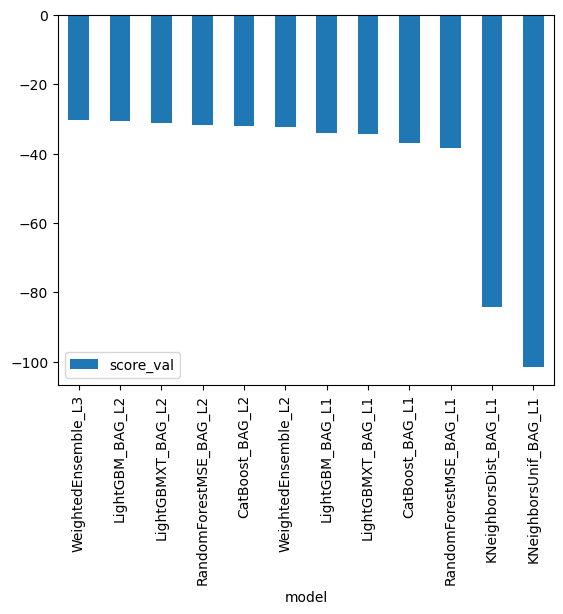

In [52]:
predictor_new_features.leaderboard(silent=True).plot(kind="bar",x="model",y="score_val")

In [53]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)


In [54]:
any(predictions_new_features<0)

False

In [55]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 677kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-10-08 07:40:45  new features          complete  0.63277      0.63277       
submission.csv               2024-10-08 07:24:07  first raw submission  complete  1.80200      1.80200       
submission_new_features.csv  2024-10-07 08:24:59  new features          complete  1.80649      1.80649       


#### New Score of `0.63277`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [64]:
from autogluon.common import space

nn_options = {
    'num_epochs': [5, 15],
    'activation': space.Categorical('relu', 'softrelu', 'tanh'),
    'dropout_prob': space.Real(0.0, 0.6, default=0.1),  # dropout probability 
}

gbm_options = {  
    'num_boost_round': 100,  # number of boosting rounds 
    'num_leaves': space.Int(lower=30, upper=60, default=40),  # number of leaves in trees
}

cat_options = {  
    'learning_rate': space.Real(0.0001, 0.1, default=0.005),
    'depth': space.Int(lower=1, upper=16, default=8),
    'l2_leaf_reg': space.Int(lower=1, upper=1024, default=32)
}

hyperparameters = {  # hyperparameters of each model type
    'GBM': gbm_options,
    'NN_TORCH': nn_options,
    'CAT': cat_options,
}  

hyperparameter_tune_kwargs = { 
    'num_trials': 10, #diff configurations for each model
    'scheduler' : 'local',
    'searcher': 'auto', # tune hyperparameters using Bayesian optimization routine with a local scheduler
}


Focusing on models giving already best results

In [65]:
predictor_new_hpo = TabularPredictor(label="count",
                                     problem_type='regression',
                                     eval_metric="root_mean_squared_error",
                                     learner_kwargs={"ignored_columns": ["casual", "registered"]}
                                     ).fit(train_data=train,
                                           time_limit=600,
                                           presets="best_quality",
                                           hyperparameters=hyperparameters,
                                           hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

2024-10-08 08:15:51,525	INFO timeout.py:54 -- Reached timeout of 50.38532037734985 seconds. Stopping all trials.
2024-10-08 08:15:51,555	WARNING experiment_state.py:205 -- Experiment state snapshotting has been triggered multiple times in the last 5.0 seconds. A snapshot is forced if `CheckpointConfig(num_to_keep)` is set, and a trial has checkpointed >= `num_to_keep` times since the last snapshot.
You may want to consider increasing the `CheckpointConfig(num_to_keep)` or decreasing the frequency of saving checkpoints.
You can suppress this error by setting the environment variable TUNE_WARN_EXCESSIVE_EXPERIMENT_CHECKPOINT_SYNC_THRESHOLD_S to a smaller value than the current threshold (5.0).
2024-10-08 08:15:51,559	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to '/home/sagemaker-user/cd0385-project-starter/project/AutogluonModels/ag-20241008_080622/models/NeuralNetTorch_BAG_L2' in 0.0151s.
2024-10-08 08:15:56,535	WARNING experiment_analysis.py:

In [66]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                 model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0  WeightedEnsemble_L3 -35.768075  root_mean_squared_error       0.802668  184.759892                0.001231           0.140059            3       True          8
1   LightGBM_BAG_L2/T1 -36.076270  root_mean_squared_error       0.801437  184.619834                0.174276          30.911263            2       True          6
2   LightGBM_BAG_L1/T2 -36.118616  root_mean_squared_error       0.152780   23.284292                0.152780          23.284292            1       True          2
3  WeightedEnsemble_L2 -36.118616  root_mean_squared_error       0.153860   23.325255                0.001080           0.040963            2       True          5
4   LightGBM_BAG_L1/T1 -39.617469  root_mean_squared_error       0.190418   28.906154                0.190418         

/opt/conda/lib/python3.11/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -39.617469073545074,
  'LightGBM_BAG_L1/T2': -36.11861644090958,
  'LightGBM_BAG_L1/T3': -52.01352106991379,
  'CatBoost_BAG_L1/T1': -66.12120466319641,
  'WeightedEnsemble_L2': -36.11861644090958,
  'LightGBM_BAG_L2/T1': -36.076269727716884,
  'CatBoost_BAG_L2/T1': -77.88705209519327,
  'WeightedEnsemble_L3': -35.76807467307896},
 'model_best': 'WeightedEnsemble_L3',
 'model_paths': {'LightGBM_BAG_L1/T1': ['LightGBM_BAG_L1', 'T1'],
  'LightGBM_BAG_L1/T2': ['LightGBM_BAG_L1', 'T2'],
  'LightGBM_BAG_L1/T3': ['Lig

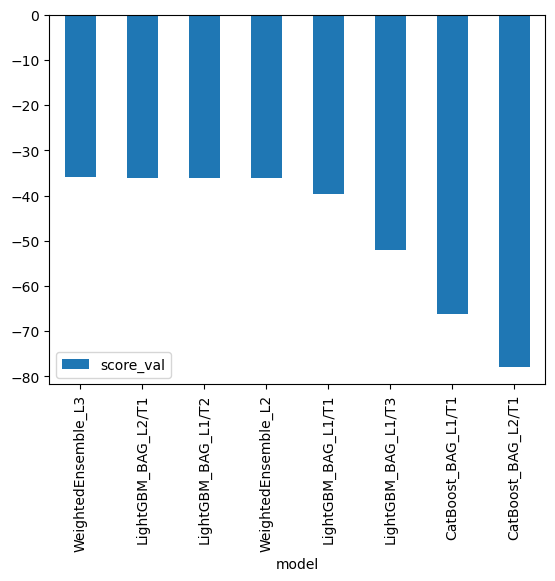

In [67]:
# Output the model's `score_val` in a bar chart to compare performance
predictor_new_hpo.leaderboard(silent=True)[:13].plot(kind="bar", x="model", y="score_val");

In [68]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test)
any(predictions_new_hpo<0)

True

In [76]:
predictions_new_hpo = np.where(predictions_new_hpo<0, 0, predictions_new_hpo)

In [77]:
# Same submitting predictions
submission_new_hpo = pd.read_csv('sampleSubmission.csv')
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 642kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-10-08 08:24:47  new features with hyperparameters  complete  0.49955      0.49955       
submission_new_hpo.csv       2024-10-08 08:23:21  new features with hyperparameters  error                                
submission_new_features.csv  2024-10-08 07:40:45  new features                       complete  0.63277      0.63277       


#### New Score of `0.49955`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

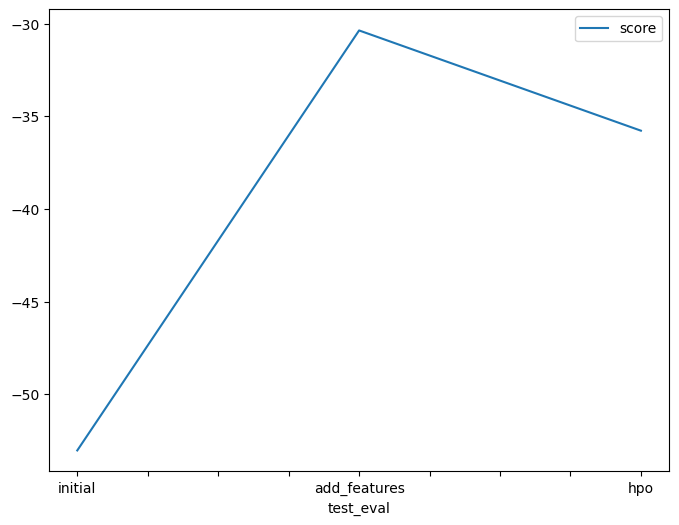

In [12]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [-53.024613, -30.359375, -35.76875]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

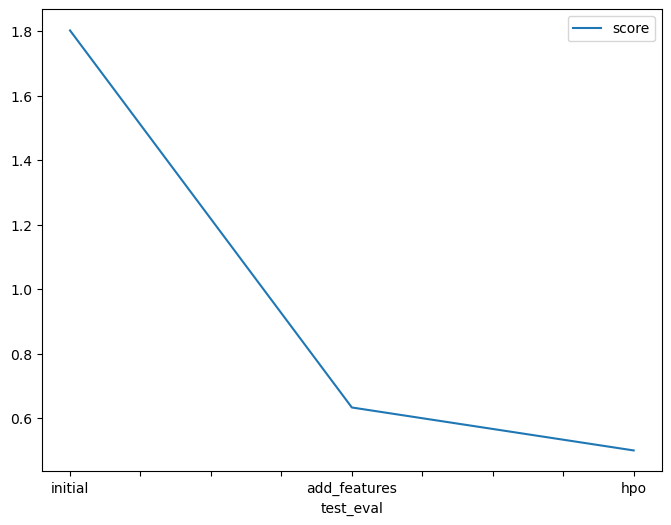

In [13]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80200, 0.63277, 0.49955]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [86]:
# The 3 hyperparameters we tuned with the kaggle score as the result
summary_table = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "NN_Torch {'num_epochs': [5, 15], 'activation': space.Categorical('relu', 'softrelu', 'tanh'), 'dropout_prob': space.Real(0.0, 0.6, default=0.1)}"],
    "hpo2": ["default", "default", "GBM {'num_boost_round': 100, 'num_leaves': space.Int(lower=30, upper=60, default=40)}"],
    "hpo3": ["default", "default", "CAT {'learning_rate': space.Real(0.0001, 0.1, default=0.005), 'depth': space.Int(lower=1, upper=16, default=8), 'l2_leaf_reg': space.Int(lower=1, upper=1024, default=32)}"],
    "score": [1.80200, 0.63277, 0.49955]
})

summary_table.to_csv("summary.csv")
summary_table

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.80200
1,add_features,default,default,default,0.63277
2,hpo,"NN_Torch {'num_epochs': [5, 15], 'activation':...","GBM {'num_boost_round': 100, 'num_leaves': spa...","CAT {'learning_rate': space.Real(0.0001, 0.1, ...",0.49955
